In [4]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

# Results Analysis
* ...

In [6]:
def load_plot(page, plot_y_org=True):
    forecast = pd.read_feather(PROPHET_PATH+VERSION+str(page)+'df.f')
    wiki.newphet.prophet_plot(forecast, plot_y_org=plot_y_org)
    plt.show()

In [7]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'
VERSION = 'v2.5/'

In [8]:
mediandf = pd.read_csv('../data/median_smapes.csv'); mediandf.head()

,Unnamed: 0,Page,median_pred,median_pred_nonzero,nans,median_smape
0,0,2NE1_zh.wikipedia.org_all-access_spider,16.0,16.0,0,40.582621
1,1,2PM_zh.wikipedia.org_all-access_spider,26.0,26.0,0,50.319311
2,2,3C_zh.wikipedia.org_all-access_spider,4.0,4.0,0,49.209093
3,3,4minute_zh.wikipedia.org_all-access_spider,15.0,15.0,0,35.679932
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,6.0,6.0,0,58.634001


In [9]:
len(mediandf)

145063

In [10]:
mediandf[mediandf.median_smape.isnull() & (mediandf.median_pred == 0)]

,Unnamed: 0,Page,median_pred,median_pred_nonzero,nans,median_smape
117,117,Pristin_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
148,148,TWICEcoaster:_LANE_2_zh.wikipedia.org_all-acce...,0.0,1.0,60,NaN
174,174,Yuri!!!_on_ICE_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
175,175,load.php_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
724,724,2015年華潔洗滌罷工事件_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
913,913,马澄坤_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
2292,2292,馬惜珍家族_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
3898,3898,歸·娘家_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
3904,3904,Special:搜索limit=20_zh.wikipedia.org_all-access...,0.0,1.0,60,NaN
4063,4063,王軼玲_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN


In [11]:
len(mediandf) - mediandf.median_smape.count()

1195

In [12]:
mediandf[mediandf.median_smape.isnull()]

,Unnamed: 0,Page,median_pred,median_pred_nonzero,nans,median_smape
117,117,Pristin_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
148,148,TWICEcoaster:_LANE_2_zh.wikipedia.org_all-acce...,0.0,1.0,60,NaN
174,174,Yuri!!!_on_ICE_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
175,175,load.php_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
724,724,2015年華潔洗滌罷工事件_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
913,913,马澄坤_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
2292,2292,馬惜珍家族_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
3898,3898,歸·娘家_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN
3904,3904,Special:搜索limit=20_zh.wikipedia.org_all-access...,0.0,1.0,60,NaN
4063,4063,王軼玲_zh.wikipedia.org_all-access_spider,0.0,1.0,60,NaN


In [13]:
pagedf = pd.read_feather(PROPHET_PATH+'pagedf.f')
ds = pd.read_feather(PROPHET_PATH+'ds.f')

In [14]:
len(pagedf.loc[:,pagedf.loc[490:].isnull().sum() == 60].columns)

1195

In [15]:
df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f')
page_index = pd.read_feather(PROPHET_PATH+'page_index.f')

In [16]:
page_index.head()

,page_index,Page
0,0,2NE1_zh.wikipedia.org_all-access_spider
1,1,2PM_zh.wikipedia.org_all-access_spider
2,2,3C_zh.wikipedia.org_all-access_spider
3,3,4minute_zh.wikipedia.org_all-access_spider
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...


In [23]:
df.head()

,page_index,v2.5_full,v2.5_val
0,61780,27.773549,21.464761
1,88262,39.201190,100.961816
2,38562,21.890778,33.040040
3,139999,52.019643,64.424648
4,60766,23.400406,83.653439


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 3 columns):
page_index    145063 non-null object
v2.5_full     145063 non-null float64
v2.5_val      145063 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.3+ MB


In [25]:
fin_df = mediandf.merge(page_index, on='Page')

In [26]:
len(fin_df)

145063

In [27]:
(fin_df['Unnamed: 0'] == fin_df['page_index']).count()

145063

In [28]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145063 entries, 0 to 145062
Data columns (total 7 columns):
Unnamed: 0             145063 non-null int64
Page                   145063 non-null object
median_pred            145063 non-null float64
median_pred_nonzero    145063 non-null float64
nans                   145063 non-null int64
median_smape           143868 non-null float64
page_index             145063 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 8.9+ MB


In [29]:
fin_df['page_index'] = fin_df['page_index'].astype(str)

In [30]:
fin_df = fin_df.merge(df, on='page_index')

In [31]:
fin_df.columns

Index(['Unnamed: 0', 'Page', 'median_pred', 'median_pred_nonzero', 'nans',
       'median_smape', 'page_index', 'v2.5_full', 'v2.5_val'],
      dtype='object')

In [32]:
fin_df['v2.5_better_than_median'] = fin_df['median_smape'] - fin_df['v2.5_val']

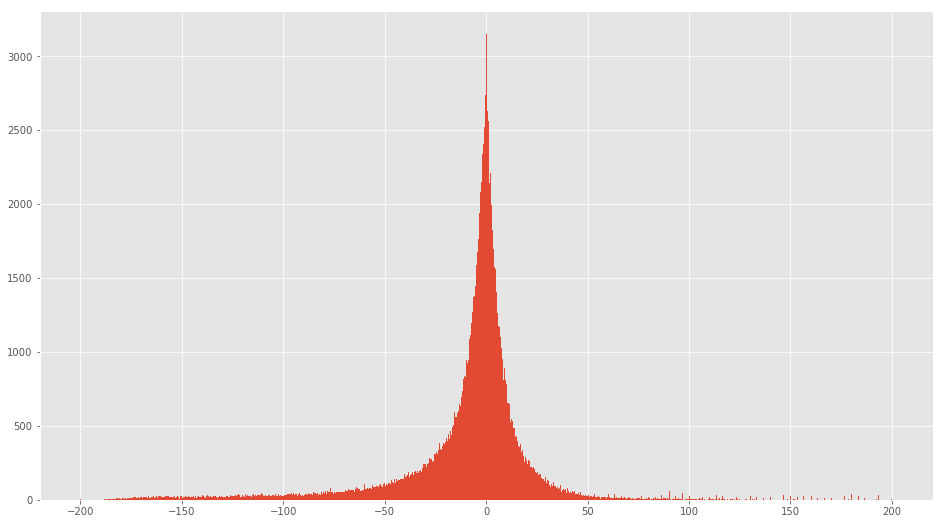

In [22]:
fin_df['v2.5_better_than_median'].hist(bins=1000)

In [23]:
len(fin_df[fin_df['v2.5_better_than_median'] > 10])

21841

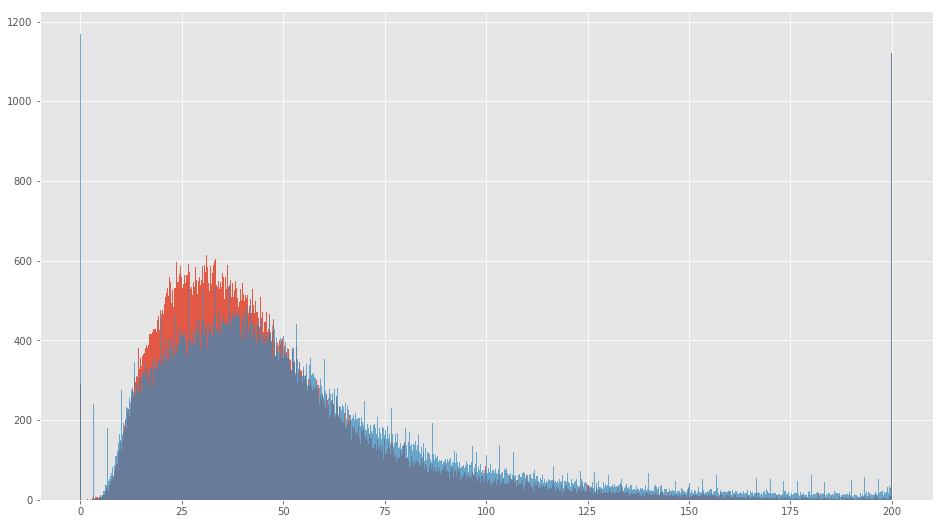

In [24]:
fin_df['median_smape'].hist(bins=1000, alpha=0.9)
fin_df['v2.5_val'].hist(bins=1000, alpha=0.7)

In [25]:
fin_df.columns

Index(['Unnamed: 0', 'Page', 'median_pred', 'median_pred_nonzero', 'nans',
       'median_smape', 'page_index', 'v2.5_full', 'v2.5_val',
       'v2.5_better_than_median'],
      dtype='object')

page_index 50931 50931
Page Schießerei_in_München_am_22._Juli_2016_de.wikipedia.org_all-access_spider
median_pred 1.0
median_smape 200.0
v2.5_val 0.0
v2.5_better_than_median 200.0


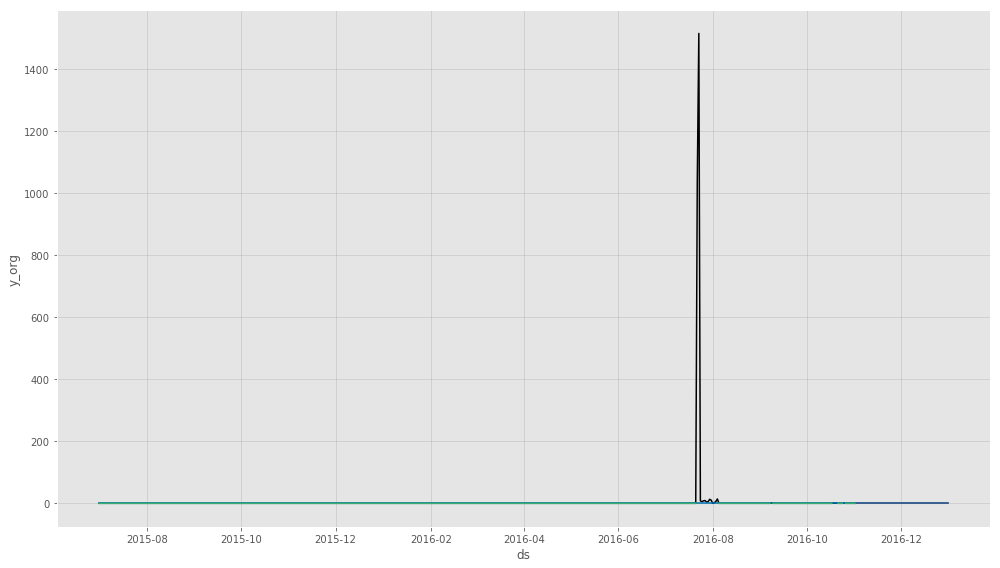

In [26]:
for row in fin_df.sort_values(by='v2.5_better_than_median',ascending=False).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])

In [27]:
len(fin_df[fin_df['v2.5_better_than_median'] > 150])

374

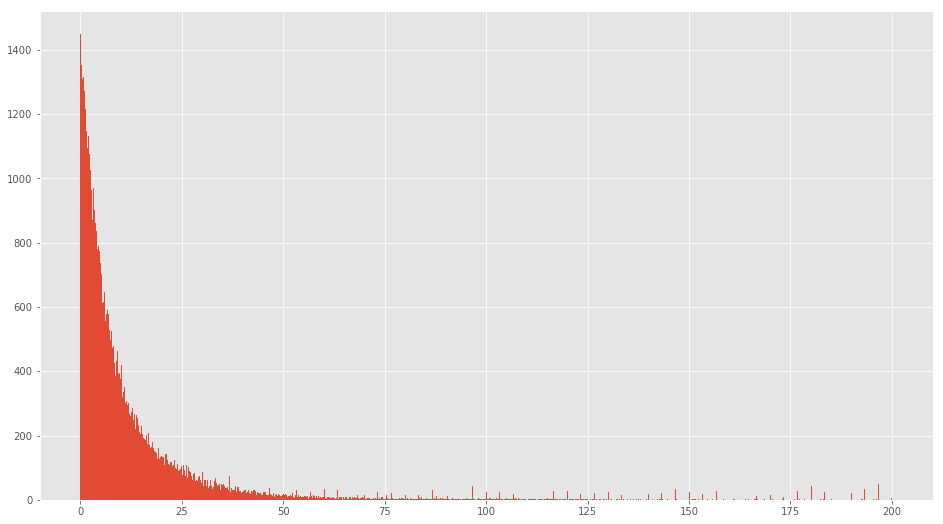

In [28]:
fin_df[fin_df['v2.5_better_than_median'] > 0]['v2.5_better_than_median'].hist(bins=1000)

page_index 49866 49866
Page Hasso_Plattner_de.wikipedia.org_all-access_spider
median_pred 4.0
median_smape 53.9246075561865
v2.5_val 48.923677629559975
v2.5_better_than_median 5.000929926626526


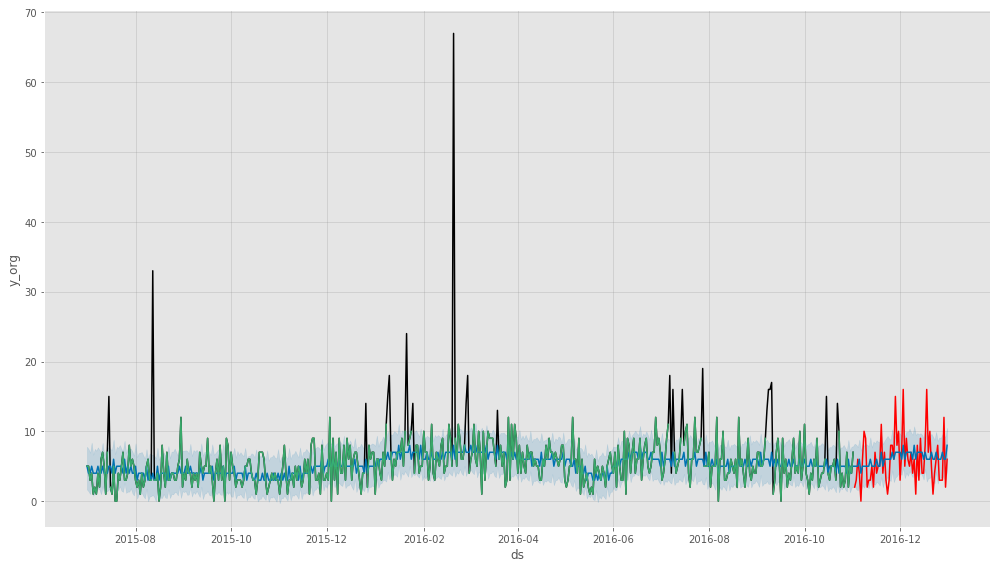

In [29]:
for row in fin_df[fin_df['v2.5_better_than_median'] > 5].sort_values(
    by='v2.5_better_than_median',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])

page_index 80385 80385
Page Special:Contributions/I.Sáček,_senior_commons.wikimedia.org_mobile-web_all-agents
median_pred 0.0
median_smape 13.333333333333336
v2.5_val 3.3333333333333335
v2.5_better_than_median 10.000000000000002


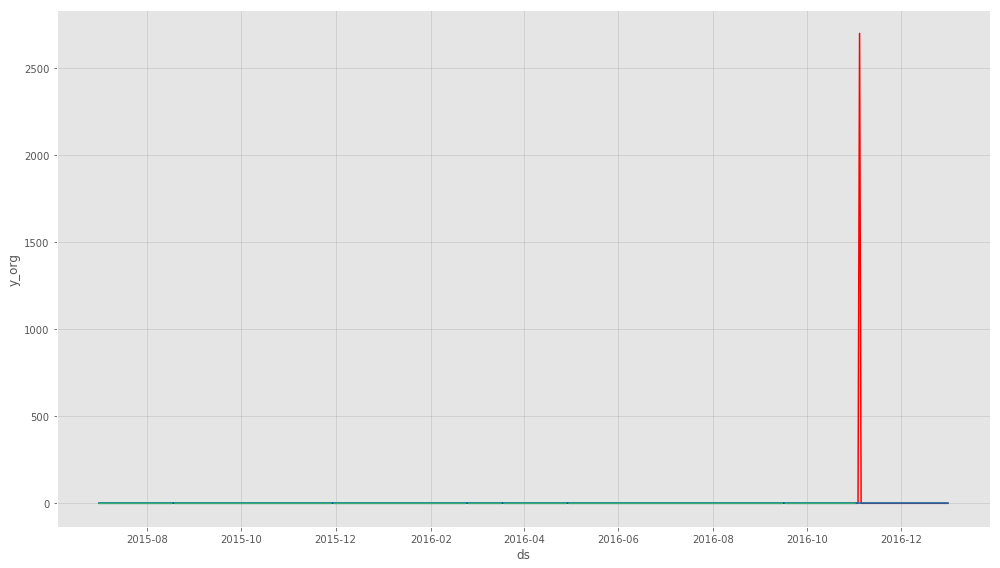

In [30]:
for row in fin_df[fin_df['v2.5_better_than_median'] > 10].sort_values(
    by='v2.5_better_than_median',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])

page_index 13406 13406
Page Category:Canidae_vulva_commons.wikimedia.org_all-access_spider
median_pred 1.0
median_smape 115.7777777777778
v2.5_val 114.77777777777779
v2.5_better_than_median 1.0000000000000142


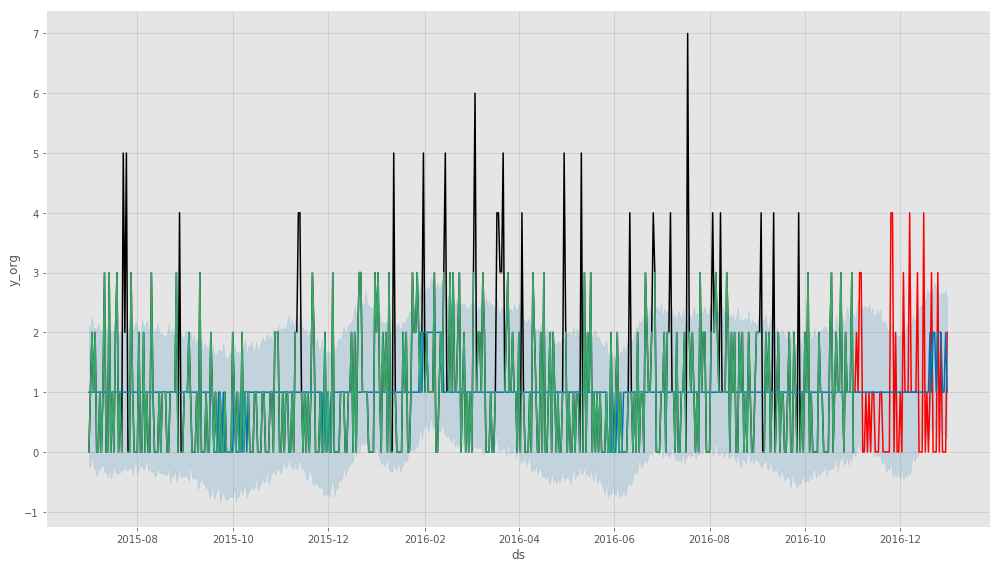

In [31]:
for row in fin_df[fin_df['v2.5_better_than_median'] > 1].sort_values(
    by='v2.5_better_than_median',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])

In [32]:
(fin_df[fin_df['v2.5_better_than_median'] >0]['v2.5_val'].mean()
 + fin_df[fin_df['v2.5_better_than_median'] <=0]['median_smape'].mean())/2

41.91483721886565

In [36]:
fin_df['v2.5_better_than_median'].count()
fin_df['v2.5_val'].count()
fin_df['median_smape'].count()

143868

In [32]:
rnn_df = pd.read_feather('../data/rnn_smape_scores.f')
rnn_df.columns = ['Page','rnn_smape']
rnn_df.head()

,Page,rnn_smape
0,2NE1_zh.wikipedia.org_all-access_spider,40.095757
1,2PM_zh.wikipedia.org_all-access_spider,39.891933
2,3C_zh.wikipedia.org_all-access_spider,50.212570
3,4minute_zh.wikipedia.org_all-access_spider,34.829330
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,47.325005


In [34]:
fin_df = fin_df.merge(rnn_df, on='Page'); 

In [37]:
print(len(fin_df))
fin_df.head()

145063


,Unnamed: 0,Page,median_pred,median_pred_nonzero,nans,median_smape,page_index,v2.5_full,v2.5_val,v2.5_better_than_median,rnn_smape
0,0,2NE1_zh.wikipedia.org_all-access_spider,16.0,16.0,0,40.582621,0,39.860109,52.131667,-11.549046,40.095757
1,1,2PM_zh.wikipedia.org_all-access_spider,26.0,26.0,0,50.319311,1,41.734634,41.292439,9.026872,39.891933
2,2,3C_zh.wikipedia.org_all-access_spider,4.0,4.0,0,49.209093,2,53.282902,50.347621,-1.138528,50.212570
3,3,4minute_zh.wikipedia.org_all-access_spider,15.0,15.0,0,35.679932,3,41.181437,34.812103,0.867830,34.829330
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,6.0,6.0,0,58.634001,4,44.547344,82.303865,-23.669864,47.325005


In [38]:
fin_df.loc[:,['v2.5_val','median_smape','rnn_smape']].corr()

,v2.5_val,median_smape,rnn_smape
v2.5_val,1.000000,0.517717,0.328456
median_smape,0.517717,1.000000,0.563612
rnn_smape,0.328456,0.563612,1.000000


In [41]:
print('median_smap', fin_df['median_smape'].mean())
print('v2.5_val', fin_df['v2.5_val'].mean())
print('rnn_smape', fin_df['rnn_smape'].mean())

median_smap 47.5413203704
v2.5_val 55.4510148902
rnn_smape 44.3816646559


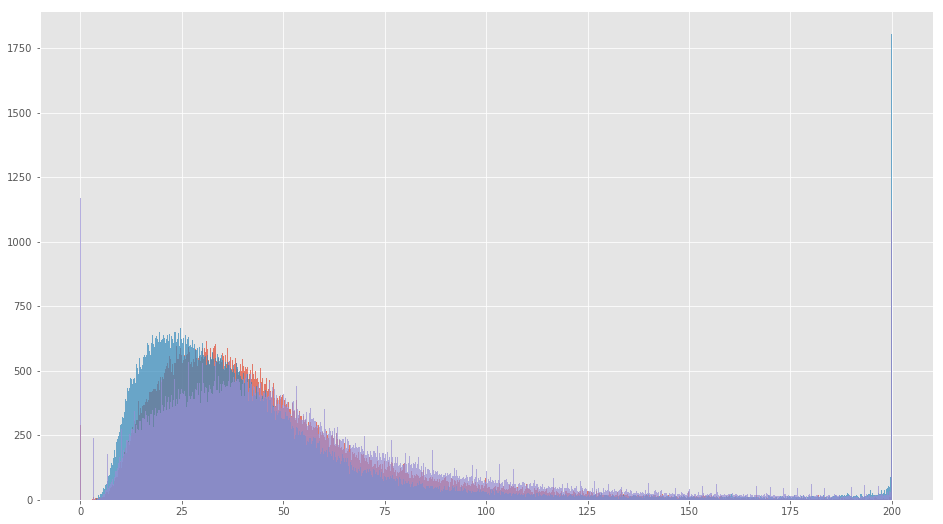

In [42]:
fin_df['median_smape'].hist(bins=1000, alpha=0.7)
fin_df['rnn_smape'].hist(bins=1000, alpha=0.7)
fin_df['v2.5_val'].hist(bins=1000, alpha=0.7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcb050668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3bcdd8ef28>]], dtype=object)

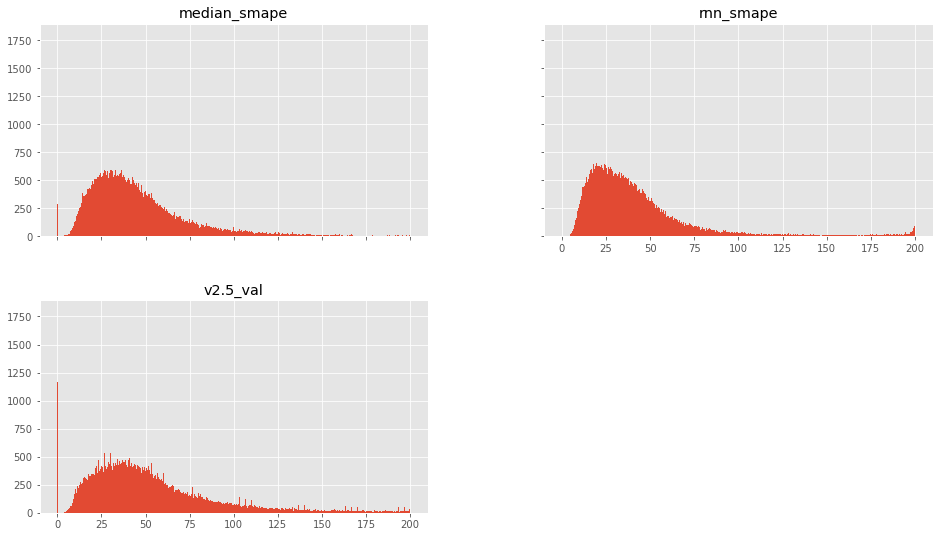

In [48]:
fin_df.loc[:,['v2.5_val','median_smape','rnn_smape']].hist(bins=1000, sharey=True, sharex=True)

In [53]:
fin_df.loc[:,['v2.5_val','median_smape']].apply(min, axis=1).mean()

41.740732822101471

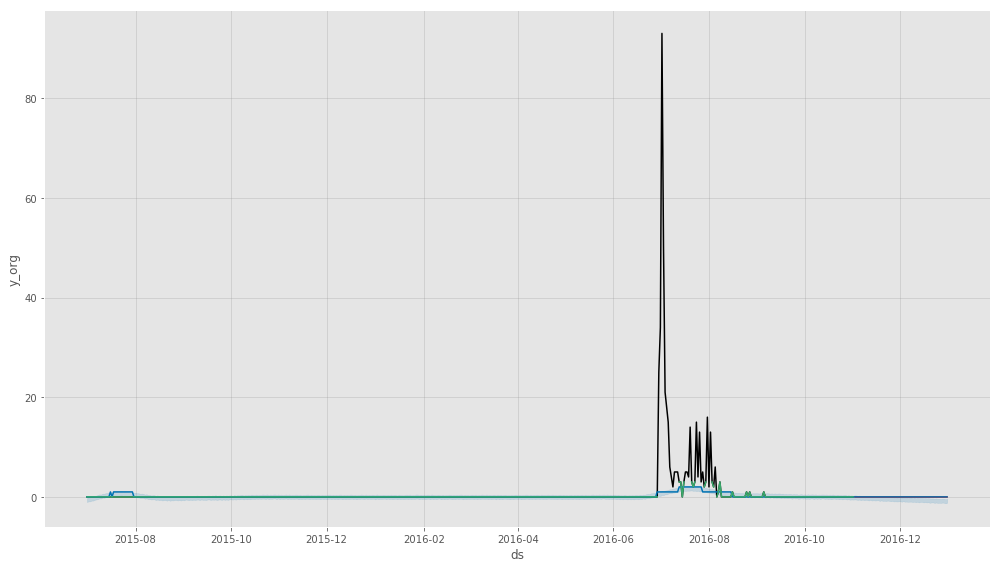

In [74]:
load_plot(4063)

In [75]:
tforecast = pd.read_feather('../data/prophet/v2.5/4063df.f')


In [77]:
tforecast.y_org

0      0.001
1      0.000
2      0.000
3      0.000
4      0.000
5      0.000
6      0.000
7      0.000
8      0.000
9      0.000
10     0.000
11     0.000
12     0.000
13     0.000
14     0.000
15     0.000
16     0.000
17     0.000
18     0.000
19     0.000
20     0.000
21     0.000
22     0.000
23     0.000
24     0.000
25     0.000
26     0.000
27     0.000
28     0.000
29     0.000
       ...  
520    0.000
521    0.000
522    0.000
523    0.000
524    0.000
525    0.000
526    0.000
527    0.000
528    0.000
529    0.000
530    0.000
531    0.000
532    0.000
533    0.000
534    0.000
535    0.000
536    0.000
537    0.000
538    0.000
539    0.000
540    0.000
541    0.000
542    0.000
543    0.000
544    0.000
545    0.000
546    0.000
547    0.000
548    0.000
549    0.000
Name: y_org, Length: 550, dtype: float64

In [21]:
wiki.val.smape()

TypeError: smape() missing 2 required positional arguments: 'y_true' and 'y_pred'

page_index 13406 13406
Page Category:Canidae_vulva_commons.wikimedia.org_all-access_spider
median_pred 1.0
median_smape 115.7777777777778
v2.5_val 114.77777777777779
v2.5_better_than_median 1.0000000000000142


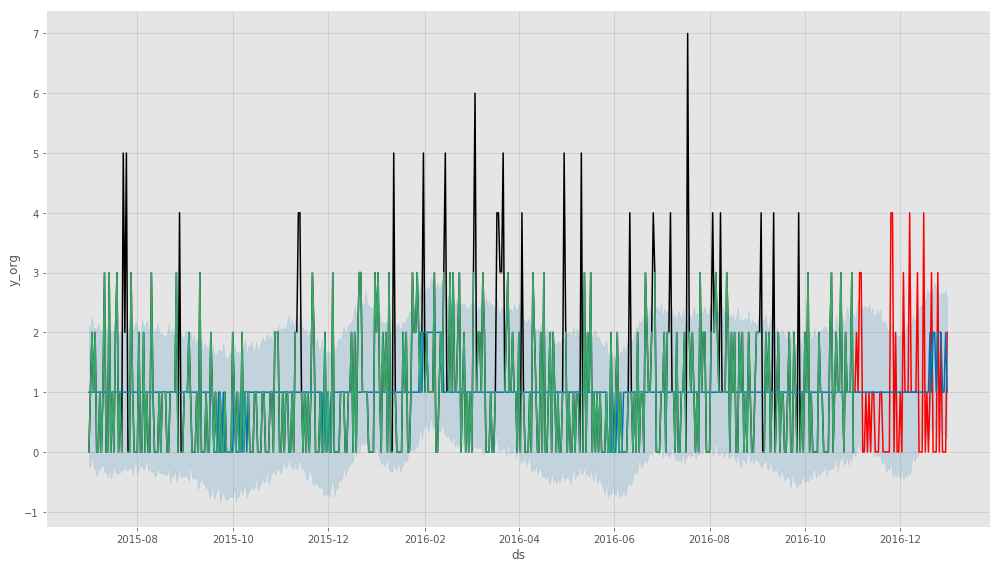

In [33]:
for row in fin_df[fin_df['v2.5_better_than_median'] > 1].sort_values(
    by='v2.5_better_than_median',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])

page_index 116196 116196
Page Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents
median_pred 1831564.0
median_smape 4.251929150954885
v2.5_val 2.435258836079316
v2.5_better_than_median 1.8166703148755685


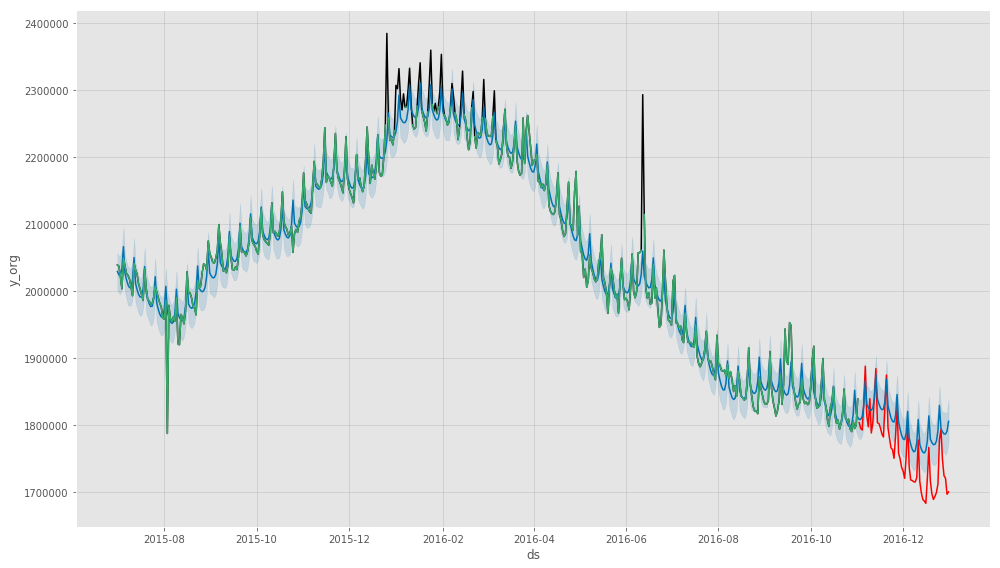

In [35]:
for row in fin_df[fin_df['v2.5_val'] > 0].sort_values(
    by='v2.5_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])

In [ ]:
for row in fin_df[fin_df['v2.5_val'] == 0].sort_values(
    by='v2.5_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0], row[1][6])
    print('Page', row[1][1])
    print('median_pred', row[1][2])
    print('median_smape', row[1][5])
    print('v2.5_val', row[1][8])
    print('v2.5_better_than_median', row[1][-1])
    load_plot(row[1][6])